<a href="https://colab.research.google.com/github/Anamikaa1234/virtualgenesis/blob/master/final_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gmplot

     |████████████████████████████████| 122kB 2.9MB/s 
  Created wheel for gmplot: filename=gmplot-1.2.0-cp36-none-any.whl size=143765 sha256=e86a8c32830036b0c59bf5df4671b6a6e2f2cc03e1222950979775cbae1804b4
  Stored in directory: /root/.cache/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot


In [0]:
import pandas as pd
import numpy as np
import gmplot
import matplotlib.pyplot as plt
import math
import sys


In [39]:
data = pd.read_csv("Data.csv")
df = pd.DataFrame(data)
print(df)


def Pothole_Detection():
    threshold_Pot = 7
    pothole = []
    pothole_Min = []
    longitude_Rd = []
    latitude_Rd = []
    km1 = []
    km = data["Kilometers Per Litre(Long Term Average)(kpl)"]
    Pot_Hole = data[" G(z)"]
    print(Pot_Hole)
    latitude = list(data.iloc[:, 3])
    longitude = list(data.iloc[:, 2])
    for i in range(len(latitude)):
        if latitude == ' Latitude ':
            longitude[i] = ' 78.50117404 '
            latitude[i] = ' 17.44283522 '
    for i in range(len(Pot_Hole)):
        if Pot_Hole[i] == ' G(z) ':
            Pot_Hole[i] = ' 0 '
    for i in range(len(Pot_Hole)):
        pothole.append(float(Pot_Hole[i]))
    print(pothole)
    for i in range(len(pothole)):
        if pothole[i] < threshold_Pot:
            pothole_Min.append(pothole[i])
            longitude_Rd.append(float(longitude[i]))
            latitude_Rd.append(float(latitude[i]))
            km1.append(km[i])
    gmap3 = gmplot.GoogleMapPlotter(17.45305, 78.48587, 13) 
    gmap3.scatter(latitude_Rd, longitude_Rd, '# FF0000', size=50, marker=False) 
    gmap3.plot(latitude_Rd, longitude_Rd, ' cornflowerblue ', edge_width=4.5) 
    gmap3.draw("map.html")  
    return 


def Parking_Location():
    longitude_pt = []
    latitude_pt = []
    speed = list(data.iloc[:, -17])
    longitude = list(data.iloc[:, 2])
    latitude = list(data.iloc[:, 3])
    time = list(data.iloc[:, 1])
    for i in range(len(speed)):
        if(speed[i] == 0):
            longitude_pt.append(longitude[i])
            latitude_pt.append(latitude[i])
    gmap3 = gmplot.GoogleMapPlotter(17.45305, 78.48587, 14) 
    gmap3.scatter(latitude_pt, longitude_pt, '# FF0000', 
                  size=50, marker=False) 
    gmap3.plot(latitude_pt, longitude_pt, 'cornflowerblue', edge_width=4.5) 
    gmap3.draw("map1.html")


def Emission_Area():
    Emission_Prone_Area = []
    time1 = []
    Emission_Of_Co2 = list(data.iloc[:, 27])
    time = list(data.iloc[:, -8])
    print(Emission_Of_Co2)
    for i in range(len(Emission_Of_Co2)):
        if Emission_Of_Co2[i] == '-':
            Emission_Of_Co2[i] = '0'
        if (float(Emission_Of_Co2[i]) > 210.0):
            Emission_Prone_Area.append(Emission_Of_Co2[i])
            time1.append(time[i])
    print("\nArea with more CO2 emission and more traffic:")
    print(Emission_Prone_Area)
    plt.scatter(time1, Emission_Prone_Area, color='green') 
    plt.xlabel(' time(sec) ')
    plt.ylabel(' pollutted area ')
    plt.title('polluted area')
    plt.legend()
    plt.show() 
    return


def Steep_Slope():
    steep_area = []
    time2 = []
    acceleration_z = list(data.iloc[:, 17])
    time = list(data.iloc[:, 1])
    print("Steep slope detection")
    for i in range(len(acceleration_z)):
        if (float(acceleration_z[i]) > 1.0):
            steep_area.append(acceleration_z[i])
            time2.append(time[i])

    print("Area prone to accident with Steep Slope")
    print(steep_area)
    plt.scatter(time2, steep_area, color='b') 
    plt.xlabel(' time(sec) ')
    plt.ylabel(' Steep Area ')
    plt.title(' Area With Steep slope ')
    plt.legend()
    plt.show()
    return
  
  



                                GPS Time  ... Volumetric Efficiency (Calculated)(%)
0     Sat Nov 02 12:58:38 GMT+05:30 2019  ...                                     -
1     Sat Nov 02 12:58:39 GMT+05:30 2019  ...                                     -
2     Sat Nov 02 12:58:40 GMT+05:30 2019  ...                                     -
3     Sat Nov 02 12:58:41 GMT+05:30 2019  ...                                     -
4     Sat Nov 02 12:58:42 GMT+05:30 2019  ...                                     -
...                                  ...  ...                                   ...
2830  Sat Nov 02 13:59:10 GMT+05:30 2019  ...                                     -
2831  Sat Nov 02 13:59:12 GMT+05:30 2019  ...                                     -
2832  Sat Nov 02 13:59:13 GMT+05:30 2019  ...                                     -
2833  Sat Nov 02 13:59:14 GMT+05:30 2019  ...                                     -
2834  Sat Nov 02 13:59:15 GMT+05:30 2019  ...                               

>emission


No handles with labels found to put in legend.


['-', '-', '-', '-', '-', '-', '144.3757324', '144.3757324', '144.3757324', '144.3757324', '144.3757324', '144.3757324', '144.3757324', '166.7933197', '166.7933197', '166.7933197', '166.7933197', '166.7933197', '166.7933197', '166.7933197', '166.7933197', '166.7933197', '166.7933197', '170.6873627', '170.6873627', '170.6873627', '170.6873627', '170.6873627', '170.189148', '170.189148', '170.189148', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '160.7015076', '193.4860687', '193.4860687', '193.4860687', '212.3031769', '212.3031769', '201.6707611', '201.6707611', '201.6707611', '194.954483', '194.954483', '194.954483', '203.8027191', '203.8027191', '191.8824158', '191.8824158', '191.8824158', '181.6437073', '181.6437073', '181.6437073', '172.8999939', '172.8999939', '183.3374329', 

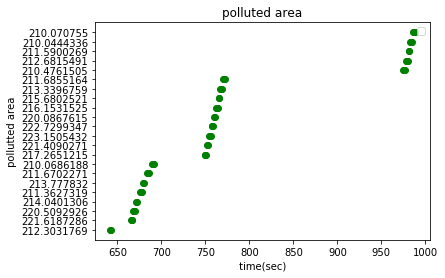

In [41]:
def main():
    command = " "
    command = input(">").lower()
    if command == "pothole":
        Pothole_Detection()
    elif command == "parking":
        Parking_Location()
    elif command == "emission":
        Emission_Area()
    elif command == "steep":
        Steep_Slope()
    elif command == "help":
        print("""
        pothole-To detect the pothole location
        parking-to find car parking location
        emission-find CO2 emission
        steep-to find steep area""")
    return

if __name__ == '__main__':
    main()
